In [2]:
import matplotlib.pyplot as plt

# K-means
K-means is an unsupervised learning method for clustering data points. The algorithm iteratively divides data points into `K` clusters by minimizing the variance in each cluster.

Here shows to estimate the best value for `K` using the elbow method and Silhouette method, then use K-means clustering to group the data points into clusters.

## How does it work?

First, each data point is randomly assigned to one of the `K` clusters. Then, we compute the **centroid** (functionally the center) of each cluster, and reassign each data point to the cluster with the closest centroid. We repeat this process until the cluster assignments for each data point are no longer changing.

K-means clustering requires us to select `K`, the number of clusters we want to group the data into. The elbow method lets us graph the inertia (a distance-based metric) and visualize the point at which it starts decreasing linearly. This point is referred to as the **"eblow"** and is a good estimate for the best value for `K` based on our data.

On the other hand, Shilhouette method is a more sophisticated method that computes the average silhouette coefficient for each data point. The silhouette coefficient is a measure of how similar a data point is to its own cluster compared to other clusters. The silhouette coefficient ranges from -1 to 1, where a higher value indicates that the data point is more similar to its own cluster than other clusters.

In [3]:
x = [4, 5, 10, 4, 3, 11, 14 , 6, 10, 12]
y = [21, 19, 24, 17, 16, 25, 24, 22, 21, 21]

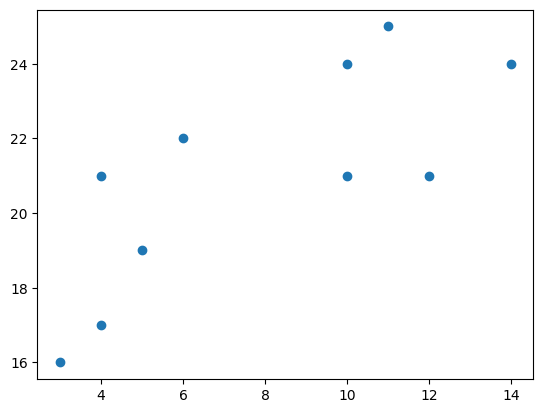

In [4]:
plt.scatter(x, y)
plt.show()

Now we utilize the elbow method to visualize the intertia for different values of K:

In [5]:
from sklearn.cluster import KMeans

## Elbow Method

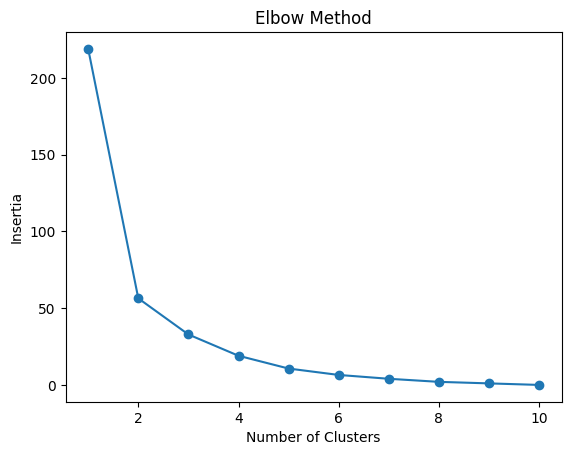

In [19]:
data = list(zip(x, y))
insertia = []

for i in range(1, 11): # Trying different K values. No need to get the dataset length. Just try 1 to 10.
    """
    n_init'auto' or int, default=10
        Number of time the k-means algorithm will be run with different centroid seeds. The final results will 
        be the best output of n_init consecutive runs in terms of inertia.

        When n_init='auto', the number of runs will be 10 if using init='random', and 1 if using init='kmeans++'.
    """
    kmeans = KMeans(n_clusters=i, init="k-means++", random_state=42, max_iter=300, n_init=10)
    kmeans.fit(data)
    insertia.append(kmeans.inertia_)

plt.plot(range(1, 11), insertia, marker="o")
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("Insertia")
plt.show()


The elbow method shows that 2 is a good value for K, so we retrain and visualize the result:

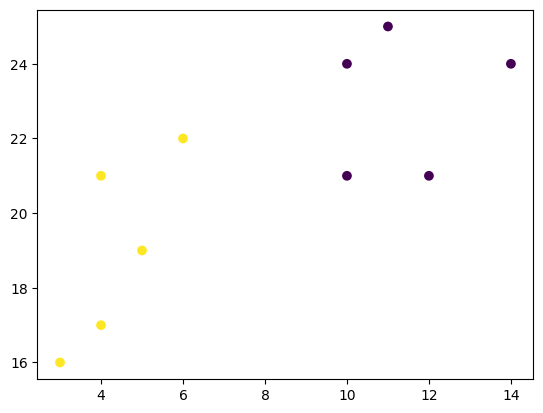

In [68]:
kmeans = KMeans(n_clusters=2, n_init=1)
kmeans.fit(data)

plt.scatter(x, y, c=kmeans.labels_)
plt.show()

## Silhouette Method

The Silhouette Coefficient is a measure of the quality of clustering that you have achieved. It measures cluster cohesion, which is the space between clusters. The range of values for the Silhouette Coefficient is between `-1` and `1`.

The Silhouette Coefficient formula is given as : $1-(a/b)$

**Where:**

- `a` is the average distance of a point to all other points in the same cluster; if `a` is small, cluster cohesion is good, as all of the points are close together

- `b` is the lowest average distance of a point to all other points in the closest cluster; if `b` is large, cluster separation is good, as the nearest cluster is far apart

If `a` is small and `b` is large, the Silhouette Coefficient is high. The value of `K` that yields the highest Silhouette Coefficient is known as the optimal `K`.

In [59]:
from sklearn import metrics

In [60]:
silhouette_samples = metrics.silhouette_samples(data, kmeans.labels_) # This requires KMean to be fitterd first.
silhouette_samples

array([0.56736516, 0.63522955, 0.60566212, 0.6620253 , 0.61875493,
       0.64421097, 0.64026787, 0.23962734, 0.43636894, 0.58949209])

In [61]:
print(f"Silhouette Mean: {silhouette_samples.mean():.8}")
print(f"Silhouette Score: {metrics.silhouette_score(data, kmeans.labels_):.8}") # This requires KMean to be fitterd first.

Silhouette Mean: 0.56390043
Silhouette Score: 0.56390043


### Finding Optimal `K`

In [70]:
silhoutte_average = []
min_K = 2

for K in range(min_K, len(data)):
    kmeans = KMeans(n_clusters=K, max_iter=300, n_init=1)
    kmeans.fit(data)
    score = metrics.silhouette_score(data, kmeans.labels_)
    silhoutte_average.append(score)
    print(f'Silhouette Coefficient K = {K} is {score}')

optimal_K = silhoutte_average.index(max(silhoutte_average)) + min_K
print(f"Optimal K is {optimal_K}")

Silhouette Coefficient K = 2 is 0.5639004266405117
Silhouette Coefficient K = 3 is 0.49918509411565803
Silhouette Coefficient K = 4 is 0.4374337785248418
Silhouette Coefficient K = 5 is 0.40868486403303333
Silhouette Coefficient K = 6 is 0.3276549398732641
Silhouette Coefficient K = 7 is 0.29836561799191885
Silhouette Coefficient K = 8 is 0.2056694081398966
Silhouette Coefficient K = 9 is 0.10813818837090103
Optimal K is 2


Text(0, 0.5, 'Silhouette Coefficients')

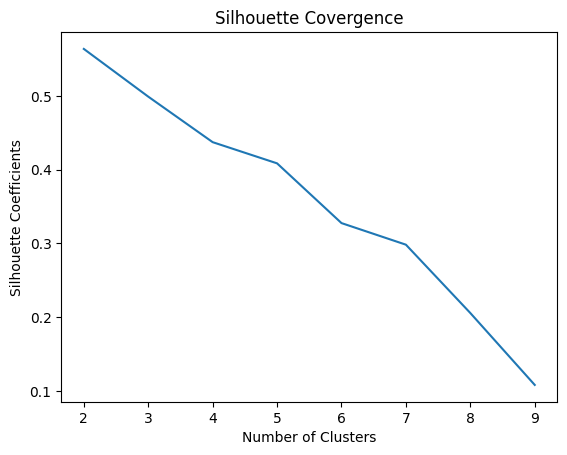

In [73]:
plt.plot(range(min_K, len(data)), silhoutte_average)
plt.title("Silhouette Covergence")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficients")